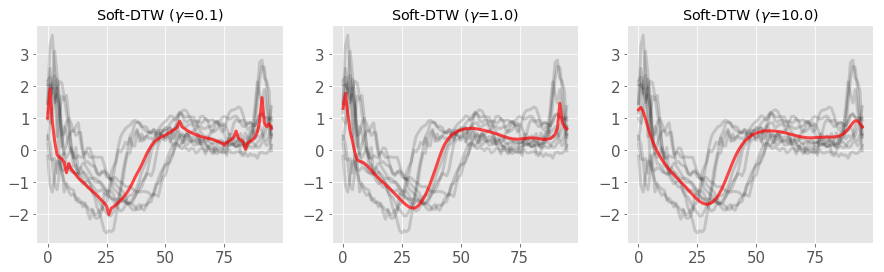

In [2]:
# Author: Mathieu Blondel
# License: Simplified BSD

import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15

from sdtw.dataset import load_ucr
from sdtw.barycenter import sdtw_barycenter


X_tr, y_tr, X_te, y_te = load_ucr("ECG200")

n = 10

# Pick n time series at random from the same class.
rng = np.random.RandomState(0)
classes = np.unique(y_tr)
k = rng.randint(len(classes))
X = X_tr[y_tr == classes[k]]
X = X[rng.permutation(len(X))[:n]]

fig = plt.figure(figsize=(15,4))

barycenter_init = sum(X) / len(X)

fig_pos = 131

for gamma in (0.1, 1, 10):
    ax = fig.add_subplot(fig_pos)

    for x in X:
        ax.plot(x.ravel(), c="k", linewidth=3, alpha=0.15)

    Z = sdtw_barycenter(X, barycenter_init, gamma=gamma)
    ax.plot(Z.ravel(), c="r", linewidth=3, alpha=0.7)
    ax.set_title(r"Soft-DTW ($\gamma$=%0.1f)" % gamma)

    fig_pos += 1

plt.show()

In [6]:
X_tr.shape

(100, 96, 1)

In [7]:
X_te.shape

(100, 96, 1)